In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
size = (6,5)

In [56]:
n_particles = 20

In [57]:
y_coordinates = size[0] * np.random.rand(n_particles)

In [58]:
x_coordinates = size[1] * np.random.rand(n_particles)

In [59]:
x_coordinates

array([0.95045298, 4.0707446 , 0.75056133, 2.81129967, 1.95063974,
       4.46273667, 4.97505742, 2.53686746, 2.25864309, 3.42499466,
       0.35363649, 3.19104968, 4.22779579, 4.56967488, 0.82683447,
       3.50515602, 4.893643  , 0.48037409, 0.78632711, 1.13985848])

In [60]:
y_coordinates

array([5.00674991, 0.41489352, 4.37859839, 0.50495322, 2.18207184,
       4.63245633, 4.63326355, 3.59684408, 4.74510603, 4.15199254,
       3.47808038, 0.20145328, 3.78515822, 5.87960477, 2.92009141,
       3.24315607, 5.94326199, 2.5928332 , 0.78460244, 3.52985353])

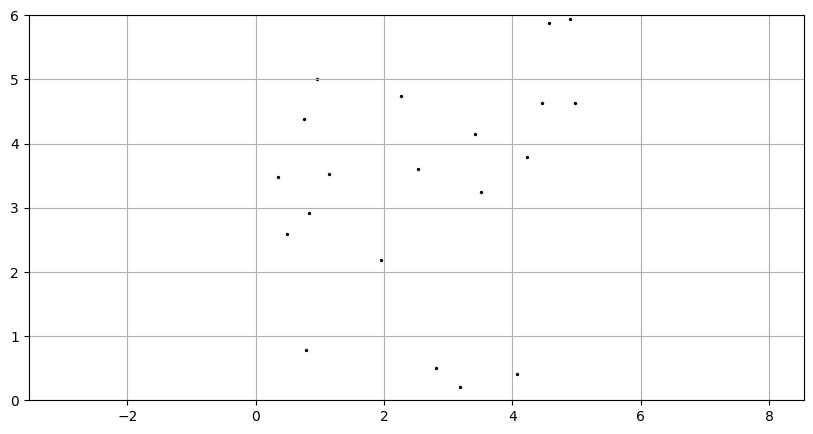

In [61]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x_coordinates, y_coordinates, c='k', s=2)
plt.axis('equal')
plt.xlim([0,size[1]])
plt.ylim([0,size[0]])
# plt.yticks([0,1,2,3])
plt.grid(alpha=1)

In [62]:
np.floor(x_coordinates).astype(int)

array([0, 4, 0, 2, 1, 4, 4, 2, 2, 3, 0, 3, 4, 4, 0, 3, 4, 0, 0, 1])

In [63]:
np.floor(y_coordinates).astype(int)

array([5, 0, 4, 0, 2, 4, 4, 3, 4, 4, 3, 0, 3, 5, 2, 3, 5, 2, 0, 3])

In [64]:
empty_image = np.zeros(size)

for x, y in zip(np.floor(x_coordinates).astype(int), np.floor(y_coordinates).astype(int)):

    empty_image[y , x] += 1

In [65]:
empty_image

array([[1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [2., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 2.],
       [1., 0., 0., 0., 2.]])

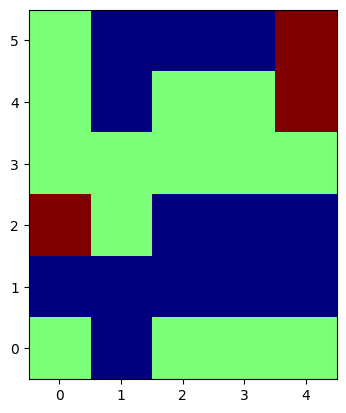

In [66]:
# fig = plt.figure(figsize=(10,5))
plt.imshow(empty_image, cmap='jet', origin='lower')
# plt.colorbar()

In [268]:
from pykitPIV import Image

In [269]:
image = Image(random_seed=100)

In [323]:
particle_height_coordinate = 2.9
particle_width_coordinate = 2.8
image_size = (6,5)
diameter=1

In [330]:
particles_with_gaussian_light = np.zeros(image_size)

px_c_height = np.floor(particle_height_coordinate).astype(int)
px_c_width = np.floor(particle_width_coordinate).astype(int)
ceil_of_particle_radius = np.ceil(diameter/2).astype(int)

for h in range(px_c_height-ceil_of_particle_radius, px_c_height+ceil_of_particle_radius+1):
    for w in range(px_c_width-ceil_of_particle_radius, px_c_width+ceil_of_particle_radius+1):

        # Only change the value of pixels that are within the image area:
        if (h >= 0 and h < image_size[0]) and (w >= 0 and w < image_size[1]):

            coordinate_height = h + 0.5 - particle_height_coordinate
            coordinate_width = w + 0.5 - particle_width_coordinate

            print("Pixel: " + str(h) + ', '+ str(w))

            print('Height: ' + str(coordinate_height))
            print('Width: ' + str(coordinate_width))
            print('- '*20)

            particles_with_gaussian_light[h,w] = particles_with_gaussian_light[h,w] + image.compute_light_intensity_at_pixel(1,
                                                                                                                            diameter,
                                                                                                                            coordinate_height,
                                                                                                                            coordinate_width,
                                                                                                                            alpha=1)


Pixel: 1, 1
Height: -1.4
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 1, 2
Height: -1.4
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 1, 3
Height: -1.4
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 1
Height: -0.3999999999999999
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 2
Height: -0.3999999999999999
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 3
Height: -0.3999999999999999
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 1
Height: 0.6000000000000001
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 2
Height: 0.6000000000000001
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 3
Height: 0.6000000000000001
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 


In [331]:
px_c_height, px_c_width

(2, 2)

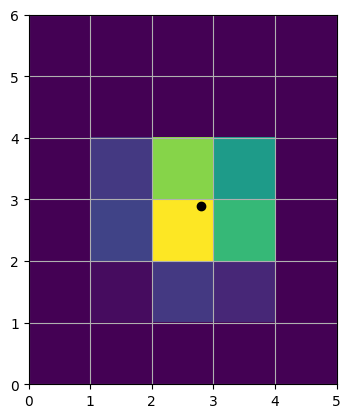

In [332]:
plt.scatter(particle_width_coordinate, particle_height_coordinate, c='k')
im = plt.imshow(particles_with_gaussian_light, origin='lower')
plt.grid()
f = lambda pixel: pixel + 0.5
im.set_extent([f(x) for x in im.get_extent()])


***